### Descargar imágenes

In [1]:
# import os
# if os.path.exists('Imagenes'):   
#     print ('La carpeta ya existe')
# else:
#     os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
#     os.system('unzip Imagenes.zip?dl=1')
#     os.system('rm -r Imagenes.zip?dl=1')
#     print('ImAgenes descargadas')

### Cargar librerías

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

Tamanho  (800, 1200, 3)


(-0.5, 1199.5, 799.5, -0.5)

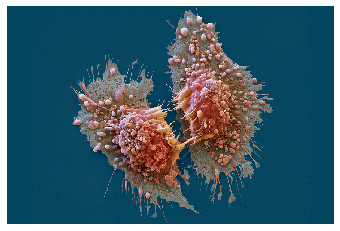

In [3]:
#Cargar y mostrar imagen
img = cv2.imread(os.getcwd()+'/Can1.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

print ('Tamanho ', np.shape(img))
plt.imshow(img)
plt.axis('off')

### Transformaciones geométricas
Las transformaciones Geométricas modifican la relación espacial entre píxeles. En términos del procesamiento de imágenes digitales una transformación geométrica consiste de dos operaciones básicas:
1. Una transformación espacial que define la reubicación de los píxeles en el plano imagen.
2. Interpolación de los niveles de grises, los cuales tienen que ver con la asignación de los valores de intensidad de los píxeles en la imagen transformada.

$${x}',{y}'=T_{x}(x),T_{y}(y)$$

### Redimensionar imágenes
Se puede redimensionar la imagen especificando el factor de escala o indicando el tamaño final, además, también es posible especificar el método de interpolación.

Argumentos de la función - Caso factor de escala.:

cv2.resize(Imagen, None, factordeEscalaX, factordeEscalaX, métodoDeInterpolación)

cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA

Tamanho  (1600, 2400, 3)


(-0.5, 2399.5, 1599.5, -0.5)

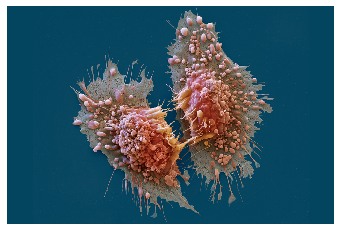

In [11]:
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_LINEAR)

print ('Tamanho ', np.shape(res))
plt.imshow(res)
plt.axis('off')

Argumentos de la función - Caso tamaño específico:

cv2.resize(Imagen, Tamaño, métodoDeInterpolación)

Tamanho  (400, 600, 3)


(-0.5, 599.5, 399.5, -0.5)

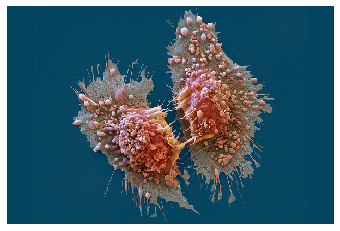

In [5]:
res = cv2.resize(img,(600, 400), interpolation = cv2.INTER_CUBIC)

print ('Tamanho ', np.shape(res))
plt.imshow(res)
plt.axis('off')

### Traslación
Una traslación es el desplazamiento de la posición de un objeto. Si se conoce la magnitud del desplazamiento ($t_{x}$ ,$t_{y}$) en las direcciones $x$ e $y$, respectivamente,  se puede escribir la matriz de transformación $M$ como:

$$M= \begin{bmatrix} 1 & 0 & t_{x}\\ 0 & 1 & t_{y} \end{bmatrix}$$

En donde se pueden obtener las nuevas coordenadas de la siguiente manera:

$$\begin{bmatrix}{x}'\\ {y}'\end{bmatrix} = \begin{bmatrix}
1 & 0 & t_{x}\\ 
0 & 1 & t_{y}
\end{bmatrix} \begin{bmatrix}x\\ y\\ 1\end{bmatrix}$$

Argumentos de la función:

cv2.warpAffine(Imagen, MatrizDeTraslación, tamañoImagenDeSalida) #Tamaño (x,y)

Tamanho  (800, 1200, 3)


(-0.5, 1199.5, 799.5, -0.5)

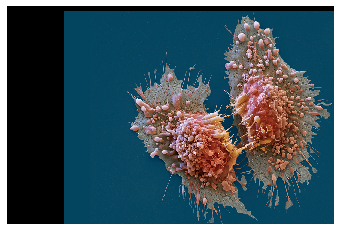

In [6]:
#Matriz de traslación y tamaño
MT = np.float32([[1,0,210],[0,1,20]])
row, col, chn=np.shape(img)

#Traslación
tras = cv2.warpAffine(img,MT,(col,row))

print ('Tamanho ', np.shape(tras))
plt.imshow(tras)
plt.axis('off')

### Rotación 
La rotación de una imagen, en un cierto ángulo θ, se logra  aplicando la siguiente matriz de transformación:

$$M_{R}= \begin{bmatrix} cos(\theta) & -sin(\theta)\\ sin(\theta) & cos(\theta) \end{bmatrix}$$

Sin embargo, OpenCV permite además personalizar más la rotación multiplacando por un factor de escala. Por otra parte, también permite cambiar el centro de rotación. La matriz de transformación modificada, con estas dos nuevas opciones, tiene la forma:

$$M_{R}= \begin{bmatrix} \alpha & \beta & (1-\alpha) \cdot x_{c} - \beta \cdot y_{c}\\
-\beta & \alpha & \beta \cdot x_{c}+(1-\alpha) \cdot y_{c}\end{bmatrix}$$

donde:

$$\alpha=escala*cos(\theta)$$
$$\beta=escala*sin(\theta)$$ 
$$x_{c}, y_{c}  : Coordenadas\, del\, centro\, de\, rotación$$


Y por lo tanto las nuevas coordenadas se obtienen de la siguiente manera:

$$\begin{bmatrix}{x}'\\ {y}'\end{bmatrix} =M_{R}\begin{bmatrix}x\\ y\\ 1\end{bmatrix}$$

Para encontrar esta matriz de transformación, OpenCV proporciona la función cv2.getRotationMatrix2D.

Argumentos de la función:

cv2.getRotationMatrix2D(PuntoDeRotación, Rotación, FactorDeScala)

Tamanho  (800, 1200, 3)


(-0.5, 1199.5, 799.5, -0.5)

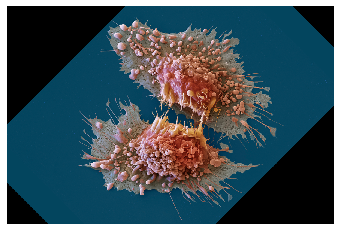

In [7]:
#Matriz de rotación y tamaño
MR = cv2.getRotationMatrix2D((col/2,row/2),45,1)
row, col, chn=np.shape(img)

#Rotación
rot = cv2.warpAffine(img,MR,(col,row))

print ('Tamanho ', np.shape(rot))
plt.imshow(rot)
plt.axis('off')

### Transformación de perspectiva
Análogo a los casos anteriores, para realizar una transformación de perspectiva es necesario especificar una matriz de transformación de tamaño $3×3$. Para generar la matriz es necesario  indicar cuatro puntos iniciales y los correspondientes 4  puntos finales del cambio de perspectiva sobre la imagen resultante. Nota: Tres de los cuatro puntos tienen que ser no-colineales, de esta manera la matriz de transformación puede ser generada utilizando la función cv2.getPerspectiveTransform. Luego, para aplicar la transformación, se utiliza cv2.warpPerspective teniendo en cuenta que se realiza con la matriz generada con la función anterior.

Argumentos de la función:

cv2.getPerspectiveTransform(PuntosDeReferencia, PuntosDelCambioDePerspectiva)

Argumentos de la función:

cv2.warpPerspective(Imagen, MatrizDeTransformación, tamañoImagenDeSalida) #Tamaño (x,y)

Tamanho  (800, 1200, 3)


(-0.5, 1199.5, 799.5, -0.5)

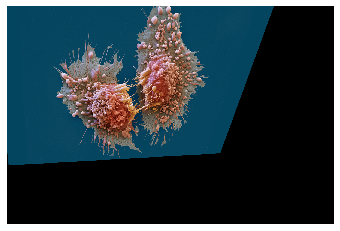

In [8]:
#Puntos de transformación
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

#Matriz de transformación
M = cv2.getPerspectiveTransform(pts1,pts2)

#Transformación
dst = cv2.warpPerspective(img,M,(1200,800))

print ('Tamanho ', np.shape(dst))
plt.imshow(dst)
plt.axis('off')